In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "/content/drive/MyDrive/LAB/LAB6/Assignments/play_tennis.csv"
df = pd.read_csv(url)
print("Shape of the data:")
print(df.shape)
print("\nData Type:")
print(type(df))
print("\nFirst 10 rows:")
print(df.head(10))

Shape of the data:
(14, 6)

Data Type:
<class 'pandas.core.frame.DataFrame'>

First 10 rows:
   day   outlook  temp humidity    wind play
0   D1     Sunny   Hot     High    Weak   No
1   D2     Sunny   Hot     High  Strong   No
2   D3  Overcast   Hot     High    Weak  Yes
3   D4      Rain  Mild     High    Weak  Yes
4   D5      Rain  Cool   Normal    Weak  Yes
5   D6      Rain  Cool   Normal  Strong   No
6   D7  Overcast  Cool   Normal  Strong  Yes
7   D8     Sunny  Mild     High    Weak   No
8   D9     Sunny  Cool   Normal    Weak  Yes
9  D10      Rain  Mild   Normal    Weak  Yes


1. Implement Naive Bayes without using library function.
2. Split Train Test as 80% and 20%. Set Random state as 6.
3. Calculate accuracy.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

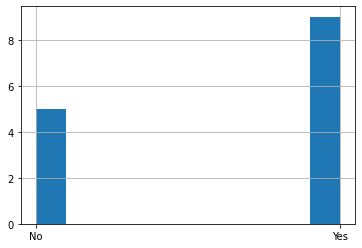

In [4]:
df['play'].hist()

In [5]:
df['play'].replace({'Yes': 1, 'No': 0}, inplace = True)
df['outlook'].replace({'Sunny':1, 'Overcast':2, 'Rain':3}, inplace = True)
df['temp'].replace({'Hot':1, 'Mild':2, 'Cool':3}, inplace = True)
df['humidity'].replace({'High':1, 'Normal':2}, inplace = True)
df['wind'].replace({'Weak':1, 'Strong':2}, inplace = True)

In [6]:
X = df.iloc[:, 1:5]
Y = df.iloc[:, 5:]

Calculate P(Y=y) for all possible y

In [7]:
def calculate_prior(Y_train):
  Y  = Y_train.columns[0]
  classes = sorted(list(Y_train.iloc[:, 0].unique()))  # Identifying unique y valyes in Y
  prior = []
  for i in classes:
    prior.append(len(Y_train[Y_train[Y]==i])/len(Y_train))   # Calculating P(Y=y) for each value of Y
  return prior

Calculate P(X=x|Y=y) using Guassian dist

In [8]:
def calculate_likelihood(X_train, feat_name, feat_val, Y_train, label):
  feat = list(X_train.columns)               # Initialising the list of features
  Y  = Y_train.columns[0]
  
  df_ = pd.concat([X_train, Y_train], axis = 1)
  df_ = df_[df_[Y]==label]                  # Separating the X values whose y=label
  p_x_given_y = len(df_[df_[feat_name]==feat_val]) / len(df_)   # Calculating P(X=x|Y=y)
  return p_x_given_y

Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find maximum

In [9]:
def naive_bayes_guassian(X_train, Y_train, X_test):
  features = list(X_train.columns)

  prior = calculate_prior(Y_train) # calculate prior predictions

  Y_pred = []

  for x in X_test.values:
    labels = sorted(list(Y_train.iloc[:, 0].unique()))   # Identifying unique y valyes in Y
    likelihood = [1]*len(labels)            
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] *= calculate_likelihood(X_train, features[i], x[i], Y_train, labels[j])
    
    post_prob = [1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]        # Calculating P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y)
    Y_pred.append(np.argmax(post_prob))
  return np.array(Y_pred)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=6) # 80% training 20% testing

In [11]:
X_test

,outlook,temp,humidity,wind
13,3,2,1,2
12,2,1,2,1
6,2,3,2,2


In [12]:
df_ = pd.concat([X_train, y_train], axis = 1)
df_

,outlook,temp,humidity,wind,play
7,1,2,1,1,0
2,2,1,1,1,1
8,1,3,2,1,1
5,3,3,2,2,0
11,2,2,1,2,1
1,1,1,1,2,0
0,1,1,1,1,0
4,3,3,2,1,1
3,3,2,1,1,1
9,3,2,2,1,1


In [13]:
y_test

,play
13,0
12,1
6,1


In [14]:
X_train.shape

(11, 4)

In [15]:
y_train

,play
7,0
2,1
8,1
5,0
11,1
1,0
0,0
4,1
3,1
9,1


In [16]:
y_pred = naive_bayes_guassian(X_train, y_train, X_test)

In [17]:
y_pred

array([1, 1, 1])

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666
